### 20.11.2024

In [1]:
import pandas as pd #For handling and analyzing data.
from bs4 import BeautifulSoup #For parsing HTML 
from tqdm import tqdm #For showing progress bars (useful in loops).
import requests #For making HTTP requests 
import re #regular expressions
import os #For interacting with the operating system (not used in the current snippet).
import time #For adding delays in your code.
from selenium import webdriver #For web automation (scraping and interaction with web pages).
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options

Initializing Web Driver

In [30]:
# choose one of the driver to your liking 
#driver: This is the instance of the Selenium WebDriver. 
#It controls the browser and allows you to interact with it.
#chrome_options = Options() #we can personalize the behaviour of the search enginge
#chrome_options.add_argument("--disable-search-engine-choice-screen")

# Start Chrome browser with specified options
#driver = webdriver.Chrome(options=chrome_options)
#webdriver.Chrome(): Initializes a Chrome WebDriver instance
#driver = webdriver.Edge()
driver = webdriver.Firefox()
wait = WebDriverWait(driver, 10)
driver.get("https://www.linkedin.com/feed/") 
#with driver.get we open the specified URL in the browser.
#For windows users Edge is fine


Accept Cookies

In [29]:
#Accept cookies (if needed)
#This section tries to find and click the cookie acceptance button. 
#If the button is not found, it prints a message
#Begins a block where code is executed and exceptions are handled.
try:
    wait = WebDriverWait(driver, 10)
    accept_cookies_button = driver.find_element(By.XPATH, '/html/body/div[1]/main/div[1]/div/section/div/div[2]/button[1]')
    #Finds the button element on the page to accept cookies using its XPath.
    accept_cookies_button.click()#the method .click is used to click the located button
    print("Cookies acceptés.")
except:
    #Catches any exceptions if the button is not found or another error occurs.
    print("Le bouton pour accepter les cookies n'a pas été trouvé.")


Le bouton pour accepter les cookies n'a pas été trouvé.


Temporary Account created for the project

In [31]:
#Copies password and username
linkedin_username = 'frezard.poolo@gmail.com'#storing the username in a variable
linkedin_password = 'MasterDS2E' #storing the password in a variable


#Paste username and the password
email_input = driver.find_element(By.ID, 'username') 
#Finds the email input field on the login page using its ID 
email_input.send_keys(linkedin_username)
wait = WebDriverWait(driver, 10)
password_input = driver.find_element(By.ID, 'password')
password_input.send_keys(linkedin_password)
# Set an explicit wait time (10 seconds)
wait = WebDriverWait(driver, 10)
password_input.send_keys(Keys.RETURN)



Closing the Chat

In [32]:
#Click to close the chat: 
try: 
    wait = WebDriverWait(driver, 10)
    close_chat_button = driver.find_element(By.CSS_SELECTOR,'button.msg-overlay-bubble-header__control svg[data-test-icon="chevron-down-small"]')
    close_chat_button.click()
    print('Chat is closed')
except:
    print("Wasn't needed")

Wasn't needed


Search the job "Data Scientist"

In [5]:
def search_for_query(driver, query):
    # Attente explicite pour que l'élément soit interactif
    search_bar = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CLASS_NAME, 'search-global-typeahead__input'))
    )
    search_bar.click()
    search_bar.send_keys(query)
    time.sleep(1)
    search_bar.send_keys(Keys.RETURN)

search_query = 'Data Scientist'
search_for_query(driver, search_query)   


#CLick on show all job results def search_for_query(driver, query):
All_results = WebDriverWait(driver, 10).until(
         EC.element_to_be_clickable((By.LINK_TEXT, "See all job results in France")))
All_results.click()


Filter Job offers

In [6]:
# Function to click elements based on CSS with the help of the text
def click_element_CSS(css, driver, wait_time=30, contains_text=None):
    try:
        #wait for element to be clicked
        elements = WebDriverWait(driver, wait_time).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, css))
        )
        # Filter elements based on the text they contain, if specified
        for element in elements:
            if contains_text is None or contains_text in element.text:
                print(f"Clicking on element: {css} with text '{element.text}'")  # Debug
                element.click()
                time.sleep(1)  # wait
                break
    except Exception as e:
        print(f"Failed to click on {css}: {e}")  # Log errore

# CSS list with also the text, if specified, or none
css_list = [
    # filter to obtain job offers published in the last 24 hours
    ("button[aria-label='Date posted filter. Clicking this button displays all Date posted filter options.']", None),
    ("label.search-reusables__value-label[for='timePostedRange-r86400']", None),
    ('div.reusable-search-filters-buttons > button.artdeco-button--primary.ml2', "Show"),  # Cerca "Show" nel testo
    
    # Filter to select the job type “internship”
    ("button[aria-label='Experience level filter. Clicking this button displays all Experience level filter options.']", None),
    ("label.search-reusables__value-label[for='experience-1']", None),
    ('div.reusable-search-filters-buttons > button.artdeco-button.artdeco-button--2.artdeco-button--primary.ember-view.ml2', "Show")  # Cerca "Show" nel testo
]

# Loop to apply filters on all elemen
def apply_filters_with_loop(driver, css_list):
    for css, text in css_list:
        click_element_CSS(css, driver, contains_text=text)

# call function
apply_filters_with_loop(driver, css_list)

Clicking on element: button[aria-label='Date posted filter. Clicking this button displays all Date posted filter options.'] with text 'Date posted'
Clicking on element: label.search-reusables__value-label[for='timePostedRange-r86400'] with text 'Past 24 hours
Filter by Past 24 hours'
Clicking on element: div.reusable-search-filters-buttons > button.artdeco-button--primary.ml2 with text 'Show 247 results'
Clicking on element: button[aria-label='Experience level filter. Clicking this button displays all Experience level filter options.'] with text 'Experience level'
Clicking on element: label.search-reusables__value-label[for='experience-1'] with text 'Internship
Filter by Internship'
Clicking on element: div.reusable-search-filters-buttons > button.artdeco-button.artdeco-button--2.artdeco-button--primary.ember-view.ml2 with text 'Show 77 results'


Function to scroll to the bottom of the list containing jobs

In [7]:
def scroll_list_to_bottom(driver, wait=3):

    try:
        #Scroll to the end of the list to load all job offers and mimics human interaction
        column_on_the_left = driver.find_element(By.XPATH, "/html/body/div[6]/div[3]/div[4]/div/div/main/div/div[2]/div[1]/div")

        #initial height
        last_scroll=0

        while True:
            #scroll of 500px each time to mimic human interaction
            driver.execute_script("arguments[0].scrollTop += 500;", column_on_the_left)
            time.sleep(wait)  # add waiting time
            
            #obtain new height page
            new_position_scroll = driver.execute_script("return arguments[0].scrollTop;", column_on_the_left)
            
            # Verify if scoll is over. if new heigh is equal to last height, we reached the bottom
            if new_position_scroll == last_scroll:
                print("Reached end of the column")
                break
            last_scroll = new_position_scroll  # update the height for next page
    
    except Exception as e:
        print(f"Error during scrollinh: {e}")


Function to collect all the jobs on the page

In [8]:
# Function to collect jobs on each page
def scrape_jobs_on_page(driver):
    
    # Scroll to load jobs
    scroll_list_to_bottom(driver)
    #Wait for jobs to load
    #WebDriverWait(driver, 10).until(
        #EC.presence_of_all_elements_located((By.CSS_SELECTOR, '.job-card-list__title')))

    WebDriverWait(driver, 40).until(EC.presence_of_all_elements_located((By.XPATH, "//a[contains(@href, '/jobs/view')]")))

    # extract all “enabled” and “disabled” job elements
    job_title_elements = driver.find_elements(By.XPATH, "//a[contains(@class, 'job-card-list__title') or contains(@class, 'disabled') and contains(@class, 'job-card-list__title')]")

    print(f"Found {len(job_title_elements)} job cards on this page.")  # Debugging line
    
    job_titles = []
    job_links = []
    

    for job_title_element in job_title_elements:
        # Get job title
        job_title = job_title_element.text.strip() if job_title_element.text else "No title found"
        
        # Get job link
        job_link = job_title_element.get_attribute('href')
        
        job_titles.append(job_title)
        job_links.append(job_link)

    return job_titles, job_links

    #for job_title_element in job_title_elements:
     #   job_title = job_title_element.text.strip()
     #   job_link = job_title_element.get_attribute('href')
        
      #  job_titles.append(job_title)
       # job_links.append(job_link)

    #return job_titles, job_links

Function to go to next page

In [14]:
# Function to switch to next page when there is "Next" Button
numb_pages = 1

def click_next_page(driver):
    global numb_pages
    try:
        #Scroll down the left column to make sure the "Next" button is visible
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
               
        # Using class name to locate the "Next" button via the span text
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR,"button.jobs-search-pagination__button--next"))
        )
        
        # Ensure that the text in the span is 'Next'
        if 'Next' in next_button.text: 
            next_button.click()
            numb_pages += 1
            print(f'Clicking on Page {numb_pages}')
            return True  # True means there is a next page
        else:
            print("No 'Next' button found.")
            return False
        
    except Exception as e:
        print(f"Error when trying to click next: {e}")
        return False  # False means no more pages


Funcion to go the next page when there is no "next" button

In [9]:
def click_button_page(driver, current_page):
    try:
        # Trova tutti i bottoni della paginazione
        buttons = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.XPATH, "//button[contains(@aria-label, 'Page')]"))
        )
        
        # Trova il bottone corrispondente alla pagina successiva
        next_page_number = current_page + 1  # Incrementa il numero della pagina
        for button in buttons:
            # Verifica se il bottone ha il testo della pagina successiva
            if button.text.strip() == str(next_page_number):
                # Scorri per assicurarti che il bottone sia visibile
                driver.execute_script("arguments[0].scrollIntoView(true);", button)
                
                # Aspetta che il bottone sia cliccabile e clicca
                WebDriverWait(driver, 10).until(EC.element_to_be_clickable(button)).click()
                
                print(f"Clicked on Page {next_page_number}")  # Debug
                time.sleep(3)  # Pausa per permettere il caricamento della nuova pagina
                return True  # Restituisce True se è stato cliccato con successo
        
        print("No more pages to click.")
        return False  # Restituisce False se non ci sono più bottoni per pagine successive

    except Exception as e:
        print(f"Errore durante il clic sui bottoni della paginazione: {e}")
        return False  # Restituisce False in caso di errore


Function to scrape all pages

In [10]:
def scrape_all_pages(driver):
    all_job_titles = []
    all_job_links = []
    page_number = 1  # to count pages

    while True:
        print(f"Scraping Page {page_number}")  # Debug
        job_titles, job_links = scrape_jobs_on_page(driver)
        all_job_titles.extend(job_titles)
        all_job_links.extend(job_links)

        #If there is button "Next"
        #if not click_next_page(driver): #page number must be given as a parameter if there is no button "next"
        #    print("No more pages. Scraping completed.")
        #   break  # The cycle is broken if there is no more button "Next"

        # Prova a cliccare i Button
        if not click_button_page(driver, page_number): #page number must be given as a parameter if there is no button "next"
            print("No more pages. Scraping completed.")
            break  # The cycle is broken if there is no more button "Next"

        page_number += 1  # Incrementa il numero della pagina
        time.sleep(5)  # Ritardo per sicurezza

    # make sure to scrape the last page
    #print(f"Scraping final page {page_number}")
    #job_titles, job_links = scrape_jobs_on_page(driver)
    #all_job_titles.extend(job_titles)
    #all_job_links.extend(job_links)

    return all_job_titles, all_job_links

#execute web scraping for all pages
all_job_titles, all_job_links = scrape_all_pages(driver)

Scraping Page 1
Reached end of the column
Found 25 job cards on this page.
Clicked on Page 2
Scraping Page 2
Reached end of the column
Found 25 job cards on this page.
Clicked on Page 3
Scraping Page 3
Reached end of the column
Found 25 job cards on this page.
Clicked on Page 4
Scraping Page 4
Reached end of the column
Found 25 job cards on this page.
Clicked on Page 5
Scraping Page 5
Reached end of the column
Found 21 job cards on this page.
No more pages to click.
No more pages. Scraping completed.


Create Dataframe

In [33]:
# Create data frame
job_offers_df = pd.DataFrame({
    'Job Title': all_job_titles,
    'Job Link': all_job_links
})

print(job_offers_df.shape)

print(job_offers_df.columns)
print(job_offers_df.head())


(121, 2)
Index(['Job Title', 'Job Link'], dtype='object')
                                           Job Title  \
0  Underwriting Intern\nUnderwriting Intern with ...   
1  STAGE - Développement d'un prototype Agentic w...   
2  Alternance - Licence ou Bachelor Banque H/F - ...   
3  STAGE - Assisant Trésorier système d'informati...   
4  Stagiaire Transaction Services (sept 2025) - N...   

                                            Job Link  
0  https://www.linkedin.com/jobs/view/4070714259/...  
1  https://www.linkedin.com/jobs/view/4017126046/...  
2  https://www.linkedin.com/jobs/view/4116502809/...  
3  https://www.linkedin.com/jobs/view/4118522175/...  
4  https://www.linkedin.com/jobs/view/4117716675/...  


Filter Job offers to avoid recommended ones

In [34]:
# Filter job titles "/jobs/view/" (because the others are the recommended ones and not the result of our search
filtered_df = job_offers_df[job_offers_df['Job Link'].str.contains('/jobs/view/')]

print(filtered_df.shape)

(118, 2)


Extract Job offer details: company name, link to company, job location, job description

In [35]:
# function to get job details
def get_job_details(filtered_links):
    # Initialise empty lists
    company_names = []
    company_links = []
    job_locations = []
    job_descriptions = []
    
    for index, job_link in enumerate(filtered_links, start=1):
    # click on job link
        print(f"I am clicking on job number: {index}")
        driver.get(job_link)
        time.sleep(3)  # Attendi che la pagina si carichi

        
        try:
            # Find the company link
            company = driver.find_element(By.CLASS_NAME, 'job-details-jobs-unified-top-card__company-name')
            company_href = company.find_element(By.TAG_NAME, 'a')
            job_location_element = driver.find_element(By.XPATH, "/html/body/div[7]/div[3]/div[2]/div/div/main/div[2]/div[1]/div/div[1]/div/div/div/div[3]/div/span[1]")

            # Extract company name
            company_name = company.text.strip()
            # Extract href
            company_link = company_href.get_attribute('href')
            # Extract location
            location = job_location_element.text.strip()
            
            # Append data to lists
            company_names.append(company_name)
            company_links.append(company_link)
            job_locations.append(location)
            
            
        except Exception as e:
            print("Error:", e)
            # If there is an error, append None
            company_names.append(None)
            company_links.append(None)
            job_locations.append(None)
        
        try:
            # Attendi che il pulsante "See more" sia cliccabile e cliccalo
            see_more_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, "//button[@aria-label='Click to see more description']"))
            )
            see_more_button.click()
            time.sleep(2)  # Wait for the description to expand


            # Now extract the job description from the <p> tags inside the job details section
            description_container = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME, "mt4"))
            )
            
            # Find all <p> tags inside the description container
            paragraphs = description_container.find_elements(By.TAG_NAME, 'p')
            
            # Combine the text of all <p> elements into a single string
            full_job_description = "\n".join([para.text for para in paragraphs])

            # Append job description to the list
            job_descriptions.append(full_job_description)


        except Exception as e:
            print("Error:", e)
            # If there is an error, append None for job description
            job_descriptions.append(None)

    return company_names, company_links, job_locations, job_descriptions


In [36]:
#trying with a subset of the original dataframe
filtered_df_60 = filtered_df.loc[0:61,]

# Obtain the details of each job offer (company names, links, locations, and descriptions)
company_names, company_links, job_locations, job_descriptions = get_job_details(filtered_df['Job Link'].tolist())

# Add new columns to the DataFrame
filtered_df['Company Name'] = company_names
filtered_df['Company Link'] = company_links
filtered_df['Location'] = job_locations
filtered_df['Job Description'] = job_descriptions

# Optional: Inspect the updated DataFrame
print(filtered_df.head())

I am clicking on job number: 1
I am clicking on job number: 2
I am clicking on job number: 3
I am clicking on job number: 4
I am clicking on job number: 5
I am clicking on job number: 6
I am clicking on job number: 7
I am clicking on job number: 8
I am clicking on job number: 9
I am clicking on job number: 10
I am clicking on job number: 11
I am clicking on job number: 12
I am clicking on job number: 13
I am clicking on job number: 14
I am clicking on job number: 15
I am clicking on job number: 16
Error: Message: Unable to locate element: /html/body/div[7]/div[3]/div[2]/div/div/main/div[2]/div[1]/div/div[1]/div/div/div/div[3]/div/span[1]; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:193:5
NoSuchElementError@chrome://remote/content/shared/we

/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_20325/1198000682.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Company Name'] = company_names
/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_20325/1198000682.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Company Link'] = company_links
/var/folders/ls/mj9skg6x7j38ls1ncwhc9s400000gn/T/ipykernel_20325/1198000682.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Show the results

In [37]:
print(filtered_df.shape)

filtered_df.head()

(118, 6)


,Job Title,Job Link,Company Name,Company Link,Location,Job Description
0,Underwriting Intern\nUnderwriting Intern with ...,https://www.linkedin.com/jobs/view/4070714259/...,Alan,https://www.linkedin.com/company/avec-alan/life,"Dijon, Bourgogne-Franche-Comté, France",🐼 Who we are\n\nAt Alan we are on an important...
1,STAGE - Développement d'un prototype Agentic w...,https://www.linkedin.com/jobs/view/4017126046/...,Dassault Systèmes,https://www.linkedin.com/company/dassaultsyste...,"Vélizy-Villacoublay, Île-de-France, France",Le stage se déroulera au sein de l’équipe de R...
2,Alternance - Licence ou Bachelor Banque H/F - ...,https://www.linkedin.com/jobs/view/4116502809/...,Caisse d'Epargne Grand Est Europe,https://www.linkedin.com/company/caisse-epargn...,"Mulhouse, Grand Est, France",Description de l'entreprise\n\nVous souhaitez ...
3,STAGE - Assisant Trésorier système d'informati...,https://www.linkedin.com/jobs/view/4118522175/...,Accor,https://www.linkedin.com/company/accor/life,"Issy-les-Moulineaux, Île-de-France, France",ACCOR recrute pour sa Direction de la Trésorer...
4,Stagiaire Transaction Services (sept 2025) - N...,https://www.linkedin.com/jobs/view/4117716675/...,Grant-Thornton France,https://www.linkedin.com/company/grant-thornto...,"Nice, Provence-Alpes-Côte d'Azur, France",Mission \n\nPour accompagner son développement...


In [38]:
filtered_df.to_csv('job_offers_linkedin.csv', index=False)

## SECOND PART OF AI: GENERATE A TEXT WHICH SUMMARIZES THE JOB-OFFER SITUATION

In [ ]:
#LOAD THE CSV
import re as re
import pandas as pd

job_offers_data =  pd.read_csv('job_offers_linkedin.csv')


import emoji

# Funzione per rimuovere le emoji
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

# Applica la funzione di rimozione emoji alla colonna 'Job Description'
job_offers_data['Cleaned Job Description'] = job_offers_data['Job Description'].apply(lambda x: remove_emoji(str(x)))

# Ora possiamo vedere i primi valori per capire se la pulizia ha funzionato
print(job_offers_data['Cleaned Job Description'].head(20))

job_offers_data['Cleaned Job Description'].astype(str)
job_offers_data['Cleaned Job Description'].dtype


job_offers_data.to_csv('job_offers_linkedin_cleaned.csv', index = False)


0      Who we are\n\nAt Alan we are on an important ...
1     Le stage se déroulera au sein de l’équipe de R...
2     Description de l'entreprise\n\nVous souhaitez ...
3     ACCOR recrute pour sa Direction de la Trésorer...
4     Mission \n\nPour accompagner son développement...
5     Description de l’entreprise\n\nInstitution fin...
6     Description De L'entreprise\n\nContinental dév...
7     The future of insurance starts with AI. To dat...
8     L’objectif du bac pro MELEC est de former en a...
9     Requisition #: 15217\n\nOur Mission: Powering ...
10    Requisition #: 15155\n\nOur Mission: Powering ...
11    Valeo is a tech global company, designing brea...
12    Nous recherchons un nouveau talent pour rejoin...
13    Valeo is a tech global company, designing brea...
14    SMILE est le leader du "sourire" au travail, m...
15    Organisation\n\nNAVAL GROUP Nous sommes un act...
16    Mission \n\nGrant Thornton Société d’Avocats, ...
17    Description de l'entreprise\n\nBPCE Soluti

In [40]:
from transformers import pipeline

# create the pipeline and make it work on CPU
translator = pipeline("translation_fr_to_en", model="Helsinki-NLP/opus-mt-fr-en", device=-1)

# the descriptions are very long so we divided them in chunks
def translate_job_description(description, target_language='en', max_length=400):
    if pd.isna(description) or description.strip() == '':
        return ''  # if it is NaN the string will be empty
    
    # dividing the long description into smaller chunks
    chunks = [description[i:i + max_length] for i in range(0, len(description), max_length)]
    
    translated_chunks = []
    for chunk in chunks:
        try:
            translated = translator(chunk)
            translated_chunks.append(translated[0]['translation_text'])
        except Exception as e:
            print(f"Errore nella traduzione: {e}")
            translated_chunks.append(chunk)  # if there is an error, the chunk will be adde without being translated

    # put together the chunks
    return ' '.join(translated_chunks)

# iterate on all the job descriptions and take count of the progress made
total_descriptions = len(job_offers_data)  # Numero totale di descrizioni
for index, row in job_offers_data.iterrows():
    print(f"Currently translating job description nr: {index + 1}/{total_descriptions}")
    job_offers_data.at[index, 'Translated Job Description'] = translate_job_description(row['Cleaned Job Description'])

print("Transalation completed!")

job_offers_data.to_csv('job_offers_linkedin_cleaned.csv', index = False)

Device set to use cpu


Currently translating job description nr: 1/118


KeyboardInterrupt: 

In [42]:
job_offers_data.head()

,Job Title,Job Link,Company Name,Company Link,Location,Job Description,Cleaned Job Description,Translated Job Description
0,Underwriting Intern\nUnderwriting Intern with ...,https://www.linkedin.com/jobs/view/4070714259/...,Alan,https://www.linkedin.com/company/avec-alan/life,"Dijon, Bourgogne-Franche-Comté, France",🐼 Who we are\n\nAt Alan we are on an important...,Who we are\n\nAt Alan we are on an important ...,Who we are At Alan we are on an important miss...
1,STAGE - Développement d'un prototype Agentic w...,https://www.linkedin.com/jobs/view/4017126046/...,Dassault Systèmes,https://www.linkedin.com/company/dassaultsyste...,"Vélizy-Villacoublay, Île-de-France, France",Le stage se déroulera au sein de l’équipe de R...,Le stage se déroulera au sein de l’équipe de R...,The course will take place within the NETVIBES...
2,Alternance - Licence ou Bachelor Banque H/F - ...,https://www.linkedin.com/jobs/view/4116502809/...,Caisse d'Epargne Grand Est Europe,https://www.linkedin.com/company/caisse-epargn...,"Mulhouse, Grand Est, France",Description de l'entreprise\n\nVous souhaitez ...,Description de l'entreprise\n\nVous souhaitez ...,Company description Want to build and develop ...
3,STAGE - Assisant Trésorier système d'informati...,https://www.linkedin.com/jobs/view/4118522175/...,Accor,https://www.linkedin.com/company/accor/life,"Issy-les-Moulineaux, Île-de-France, France",ACCOR recrute pour sa Direction de la Trésorer...,ACCOR recrute pour sa Direction de la Trésorer...,ACCOR hires an Information Systems Treasurer A...
4,Stagiaire Transaction Services (sept 2025) - N...,https://www.linkedin.com/jobs/view/4117716675/...,Grant-Thornton France,https://www.linkedin.com/company/grant-thornto...,"Nice, Provence-Alpes-Côte d'Azur, France",Mission \n\nPour accompagner son développement...,Mission \n\nPour accompagner son développement...,"Mission To support its sustained development, ..."


In [ ]:
job_offers_data.to_csv('job_offers_linkedin_cleaned.csv', index = False)

job_offers_data =  pd.read_csv('job_offers_linkedin_cleaned.csv')

In [45]:
#PRELIMINARY ANALYSIS

#total number of offers
total_number = len(job_offers_data)

#analysis of location
location_counts_noNA = job_offers_data['Location'].notna().sum()
location_counts_clean =job_offers_data['Location'].dropna().str.strip().str.lower()

north_locations = location_counts_clean[location_counts_clean.str.contains("lille|paris|rouen|amiens|le havre|calais|dunkerque|arras|lens|saint-quentin|reims|Hauts-de-France|Île-de-France|Normandie", case=False)].count()
south_locations = location_counts_clean[location_counts_clean.str.contains("marseille|nice|toulouse|montpellier|bordeaux|nîmes|avignon|aix-en-provence|perpignan|cannes|saint-tropez|biarritz|toulon|arles|menton|ajaccio|Provence-Alpes-Côte d'Azur|Occitanie|Corse", case=False)].count()
east_locations = location_counts_clean[location_counts_clean.str.contains("dijon|strasbourg|mulhouse|nancy|metz|dijon|besançon|colmar|troyes|Grand Est|Bourgogne-Franche-Comté|Auvergne-Rhône-Alpes|Alsace", case=False)].count()
west_locations = location_counts_clean[location_counts_clean.str.contains("nantes|rennes|brest|angers|la rochelle|le mans|tours|saint-malo|caen|cherbourg|Bretagne|Pays de la Loire|Centre-Val de Loire", case=False)].count()

print(f'total number of job offers located in the North of France:',north_locations)
print(f'total number of job offers located in the South of France:',south_locations)
print(f'total number of job offers located in the East of France:',east_locations)
print(f'total number of job offers located in the West of France:',west_locations)

#hybrid opportunities
hybrid_jobs = job_offers_data['Translated Job Description'].str.contains('hybrid', case = False).sum()
print(f'total number of jobs which allow hybrid work:',hybrid_jobs)

total number of job offers located in the North of France: 71
total number of job offers located in the South of France: 16
total number of job offers located in the East of France: 12
total number of job offers located in the West of France: 5
total number of jobs which allow hybrid work: 3


In [44]:
#extract the industry
from transformers import pipeline

# Question-Answering model
qa_pipeline = pipeline("question-answering", model="distilbert-base-uncased-distilled-squad")

#function to extract the industry from the job description
def extract_industry(description):
    question = "in which industry or sector does the company operate?"
    context = description

    try:
        answer = qa_pipeline(question=question, context=context)
        return answer['answer'] #if answer['score'] > 0.5 else "Industry not found"
    
    except Exception as e:
        return('Industry not found')

Device set to use mps:0


In [46]:
job_offers_data['Translated Job Description'] = job_offers_data['Translated Job Description'].astype(str)

# Estrai l'industria per ogni job description
job_offers_data['Industry'] = job_offers_data['Translated Job Description'].apply(extract_industry)

# Mostra il dataframe con le industrie
print(job_offers_data.head())

                                           Job Title  \
0  Underwriting Intern\nUnderwriting Intern with ...   
1  STAGE - Développement d'un prototype Agentic w...   
2  Alternance - Licence ou Bachelor Banque H/F - ...   
3  STAGE - Assisant Trésorier système d'informati...   
4  Stagiaire Transaction Services (sept 2025) - N...   

                                            Job Link  \
0  https://www.linkedin.com/jobs/view/4070714259/...   
1  https://www.linkedin.com/jobs/view/4017126046/...   
2  https://www.linkedin.com/jobs/view/4116502809/...   
3  https://www.linkedin.com/jobs/view/4118522175/...   
4  https://www.linkedin.com/jobs/view/4117716675/...   

                        Company Name  \
0                               Alan   
1                  Dassault Systèmes   
2  Caisse d'Epargne Grand Est Europe   
3                              Accor   
4              Grant-Thornton France   

                                        Company Link  \
0    https://www.linkedin.com

In [47]:
#mostra i valori unici delle industrie
industries_values = job_offers_data['Industry'].str.lower().value_counts()
print(industries_values)

automotive                                                        4
industrial and tertiary                                           3
technology                                                        3
engineering                                                       3
finance                                                           3
                                                                 ..
industrial maintenance                                            1
environmental protection                                          1
conseil opérative & outsourcing                                   1
energy                                                            1
tech, automotive, energy, luxury, defence, aeronautics, retail    1
Name: Industry, Length: 94, dtype: int64


In [49]:
top_industries = ', '.join(industries_values.index[0:5])
print(top_industries)

automotive, industrial and tertiary, technology, engineering, finance


In [50]:
# Save then new dataframe
job_offers_data.to_csv('updated_job_offers_linkedin.csv', index=False)

In [51]:
#function to extract the timespan of the job from the job description
def extract_job_duration(description):
    question = "how much time (months or years) will the job contract last?"
    context = description 

    try:
        answer = qa_pipeline(question=question, context=context)
        return answer['answer']
    
    except Exception as e:
        return('Type of contract not found')

In [52]:
# apply the function 
job_offers_data['Time period'] = job_offers_data['Translated Job Description'].apply(extract_job_duration)

In [55]:
# Mostra il dataframe con il time period
print(job_offers_data['Time period'])
print(job_offers_data['Time period'].value_counts())

most_frequent_time_period = job_offers_data['Time period'].value_counts().index[0]
print(most_frequent_time_period)


0                                    6 months
1                                up to a year
2                                   13 months
3                                     6-month
4                                up to a year
                        ...                  
113                                   6-month
114                                  56 years
115    dozens of M&A and Private Equity deals
116                                   6 month
117                            6 to 12 months
Name: Time period, Length: 118, dtype: object
up to a year                                                  28
6 months                                                      17
6 month                                                        7
6-month                                                        5
4 to 6 months                                                  3
between 12 and 32€/h                                           3
6 to 12 months                                            

In [59]:
def extract_skills (description):
    question = "What are the technical skills the applicant must have?"
    context = description 
    try:
        answer = qa_pipeline(question=question, context=context)
        return answer['answer']

    except Exception as e:
        return ('skills not found')

In [60]:
job_offers_data['Required Skills'] = job_offers_data['Translated Job Description'].apply(extract_skills)

print(job_offers_data['Required Skills'].head()) 

0                          healthcare and death & disa
1           IA / agents / LLM / ML Development back C#
2    economy, social housing, real estate professio...
3                              finance, treasury or IT
4                                                Audit
Name: Required Skills, dtype: object


In [61]:
skills_required = job_offers_data['Required Skills'].value_counts()
print(skills_required)

deep technical expertise                                                  2
you or up to a year and be notified about jobs and updates                2
experts' and engineers' deep technical expertise                          2
teamwork                                                                  2
Pleasure, Transmission, Excellence, Empathy, Integrity and Commitment     2
                                                                         ..
financial modeling and valuation                                          1
safety, excellence, innovation, team spirit and transparency              1
Respect, transparency and performance                                     1
You will enrich your synthesis spirit and your technological expertise    1
real sales skills                                                         1
Name: Required Skills, Length: 112, dtype: int64


In [62]:
job_offers_data.to_csv('updated_job_offers_linkedin.csv', index=False)

# Analysis of the skills
The purpose of this process is to quickly identify the most relevant skills, technologies, and keywords that appear across job descriptions. By highlighting these key terms, it helps job seekers tailor their resumes or cover letters to match in-demand requirements and assists recruiters in spotting trends in job postings, such as commonly requested qualifications or emerging industry needs. Additionally, it can be used to compare job descriptions, detect patterns, and group similar roles, making it useful for both job market analysis and hiring strategies.

In [74]:
# Import necessary libraries
import pandas as pd
import nltk #NLP library for tokenization, rimozione di stopwords, e lemmatization.
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF (Term Frequency-Inverse Document Frequency), measures the importance of a word 
from wordcloud import WordCloud
import matplotlib.pyplot as plt #to visualize the wordcloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#stopwords, word_tokenize and WordLemmarizer are used to manage stopwords, to tokenize the text and to reduce words to their base form

* **Stopwords**: stopwords are often common words such as articles, prepositions, conjunctions, and pronouns, which, although grammatically necessary, do not add much informational value in text analysis models.
* **Lemmatization**:  is the process of reducing a word to its base or dictionary form, known as a lemma. Unlike stemming, which simply chops off word suffixes to get a root, lemmatization considers the word's meaning and its grammatical variations. The goal is to return the word to its "standard" form that can be found in a dictionary.

In [75]:
# Download NLTK resources (if not already downloaded) for english words 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer object and stopwords list
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/francescavasta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francescavasta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/francescavasta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Pre-processing text in english

In [76]:
# Load the CSV file containing job descriptions
file_path = "updated_job_offers_linkedin.csv"  
df = pd.read_csv(file_path)

descriptions = df['Translated Job Description'].astype(str)

# Function to preprocess text in english
def preprocess_text(text):
    # Tokenize the text and convert everything to lowercase
    tokens = word_tokenize(text.lower()) #the word_tokenize function from NLTK performs word-based tokenization
    # Lemmatize tokens and remove special characters
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum()] #checks if the word is alphanumeric
    # Remove stopwords (common words with little meaning)
    tokens = [word for word in tokens if word not in stopwords] #checks if the word is in the stop_words list or not
    return ' '.join(tokens) #return the clenaed text in a unique string

# Apply preprocessing to each job description
descriptions_cleaned = descriptions.apply(preprocess_text)
df['Translated Job Description_cleaned'] = descriptions_cleaned

In [77]:
# Display a sample of original and cleaned descriptions
print(df[['Translated Job Description', 'Translated Job Description_cleaned']].head())


                          Translated Job Description  \
0  Who we are At Alan we are on an important miss...   
1  The course will take place within the NETVIBES...   
2  Company description Want to build and develop ...   
3  ACCOR hires an Information Systems Treasurer A...   
4  Mission To support its sustained development, ...   

                  Translated Job Description_cleaned  
0  alan important mission empower everyone live l...  
1  course take place within netvibes r team charg...  
2  company description want build develop tomorro...  
3  accor hire information system treasurer assist...  
4  mission support sustained development grant th...  


## TD-IDF Vectorization
TF-IDF stands for Term Frequency - Inverse Document Frequency, and it’s a statistical technique used to measure how important a word in a document is within a collection of documents (or job descriptions, in our case).

The single job description is the document, while the entire dataset of all job-descriptions is the corpus (or collection of documents)

* Term Frequency (TF): Measures the frequency of a word within a single document. The more a word appears in a document, the higher its frequency (TF).

* Inverse Document Frequency (IDF): Measures the importance of a word relative to the entire document corpus. If a word appears in many documents, its importance will be low (since it is a common word). If a word appears in few documents, its importance will be high (since it is more distinctive).

TF-IDF vectorizer is a tool or algorithm (often part of machine learning libraries like scikit-learn) that computes the TF-IDF scores for all words in a set of documents (corpus).

### How the `TfidfVectorizer` Works:

1.  **Input**: The `TfidfVectorizer` takes a set of job descriptions as input (a **corpus of documents**).
    
2.  **Process**:
    
    *   For each document, the vectorizer calculates the TF-IDF score for each word in the document.
    *   The most important words (those with the highest TF-IDF scores) are kept, with a maximum of **1000 words** due to the parameter `max_features=1000`.
    
3.  **Output**: The result is a **sparse matrix**, where each row represents a job description (a document), and each column represents one of the 1000 most important words. Each element in the matrix contains the TF-IDF score of a specific word in a particular document.

In [78]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 most important terms
tfidf_matrix = tfidf_vectorizer.fit_transform(descriptions_cleaned)
feature_names = tfidf_vectorizer.get_feature_names_out() 
#with 'get_feature_names_out() we obtain a list of all the features that the model identified during text vectorization. 
# #In other words, these are the words that were selected as significant (important) during the process of calculating TF-IDF scores.


Once the model has created the TF-IDF matrix, each element of the matrix contains the TF-IDF score for a given word in a given job description.

What is done in the next code is to calculate the sum of all TF-IDF scores for each word across all documents (job descriptions). This yields an overall score for each word, which indicates the overall importance of that word in the corpus of job descriptions.

Translated with DeepL.com (free version)

In [79]:
# Sum the TF-IDF scores for each word across all descriptions
tfidf_scores = tfidf_matrix.sum(axis=0).A1
word_scores = dict(zip(feature_names, tfidf_scores)) #the dictionary will have the single words as key and the tdif_scores as values

In [80]:
# Generate a word cloud from the TF-IDF scores
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

In [81]:
# Print the top 20 keywords with their TF-IDF scores
top_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:20]
print("Top 20 Keywords with their TF-IDF Scores:")
for word, score in top_words:
    print(f"{word}: {score:.3f}")

Top 20 Keywords with their TF-IDF Scores:
team: 7.075
data: 5.999
company: 5.513
group: 5.111
development: 4.648
project: 4.643
business: 4.625
customer: 4.486
solution: 4.472
service: 4.199
technology: 3.912
engineering: 3.877
management: 3.804
work: 3.794
mission: 3.738
support: 3.645
digital: 3.643
learn: 3.589
experience: 3.584
product: 3.484


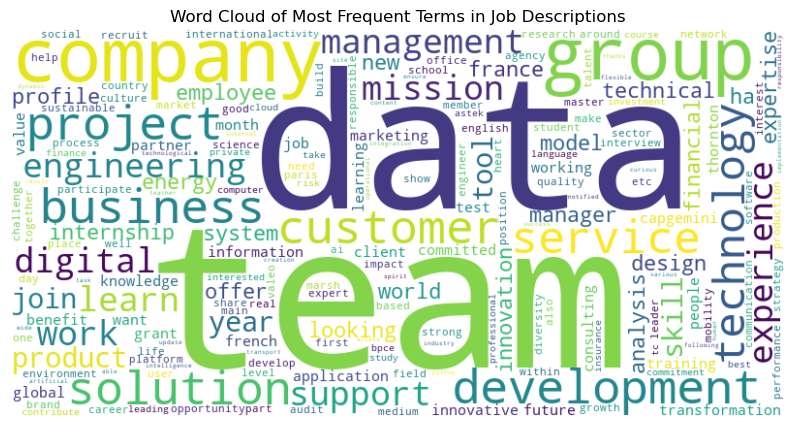

In [82]:
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Frequent Terms in Job Descriptions")
plt.show()

## TEXT GENERATION PART 

In [ ]:
###### TEXT GENERATION 

#!pip install sentencepiece to do if not already installed

from transformers import T5Tokenizer, T5ForConditionalGeneration


# Load the tokenizer and the model 
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")


In [116]:
import torch

# context set up
context = f"""
Total number of job offers in France: {total_number}
- Number of job offers in the North of France: {north_locations}
- Number of job offers in the South of France: {south_locations}
- Number of job offers in the West of France: {west_locations}
- Number of job offers in the East of France: {east_locations}
- Total number of hybrid job offers: {hybrid_jobs}
- Leading industries in demand for employees: {top_industries}
- Most common contract duration: {most_frequent_time_period}
"""

# detailed prompt for T5
input_text = f'''
Generate a long, detailed, and professional text that analyzes the current employment trends in France. 
Talk the following insights:
1. The total number of job offers in France and details of the job offers across different regions (North, South, West, East).
2. The prevalence of hybrid job offers in France.
3. The leading industries currently in high demand for employees.
4. The most common contract lenght being offered.

Here is the information you should base your analysis on:
{context}
'''

# Tokenize the input text
inputs = tokenizer(input_text, return_tensors="pt")

# Generate the improved text
outputs = model.generate(
    inputs.input_ids,  
    max_length=1500,
    num_return_sequences=1,
    temperature=1.2,
    top_p=0.95,
    num_beams=5,
    no_repeat_ngram_size=2
)

# Decode the result
improved_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Print the generated text
print(improved_text)

The most common contract length offered in France is up to a year.
